In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df1 = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/Disposable_income_adj.csv', na_values=['NA'])
df1

,Geography,Category,Data Type,Unit,Currency Conversion,Current Constant,2011,2012,2013,2014,2015,2016,2017
0,Azerbaijan,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"12,100.4","13,387.7","15,171.3","16,581.1","17,582.4","19,983.5","23,225.3"
1,Bangladesh,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"68,540.6","78,411.0","88,036.1","98,314.5","110,726.9","123,994.2","140,115.3"
2,Cambodia,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"10,895.1","11,462.9","12,178.9","13,208.8","14,245.7","15,621.0","16,650.9"
3,China,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"3,881,003.1","4,352,694.4","4,824,248.7","5,274,231.8","5,715,663.3","6,227,634.1","6,905,378.4"
4,"Hong Kong, China",Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"197,233.6","210,413.9","225,046.0","238,473.1","251,846.5","259,548.5","279,337.5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Spain,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"736,907.0","698,018.0","695,391.3","696,649.0","724,290.1","743,436.6","765,902.1"
99,Sweden,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"168,949.0","176,216.4","181,210.1","187,513.0","194,344.1","202,993.2","211,414.4"
100,Switzerland,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"410,435.0","416,011.6","425,268.0","429,824.9","429,682.3","434,565.4","435,272.0"
101,Turkey,Disposable Income,Socio-economic indicators,USD million,Fixed 2023 ex rates,Current Prices,"40,401.6","44,848.7","52,616.2","59,424.4","67,770.2","75,273.9","89,600.5"


In [3]:
df2 = pd.read_csv('https://github.com/purachai-phonwisut/machine_learning_project/raw/main/Data%20cleaned/raw/values_long_format.csv', na_values=['NA'])
df2

,Country,2017,2015,2013,2011,region
0,Australia,540,579,743,763,AP
1,Bangladesh,226,236,197,147,AP
2,Brunel,18,19,13,25,AP
3,China,"6,842","8,657","8,767","8,902",AP
4,Hong Kong,277,320,316,232,AP
...,...,...,...,...,...,...
111,Portugal,137,145,180,245,WE
112,Spain,859,913,"1,044","1,216",WE
113,Sweden,260,288,397,461,WE
114,Switzerland,399,448,469,514,WE


In [4]:
df2['Country'].replace({'United States': 'USA'}, inplace=True)
df1.rename(columns={'Geography':'Country'}, inplace= True)
numeric_columns = ['2011', '2012', '2013', '2014', '2015', '2016', '2017']
df1[numeric_columns] = df1[numeric_columns].replace({',': ''}, regex=True).astype(float)

In [5]:
df1["Income"] = df1.iloc[:, 6:13].mean(axis=1).round(2)
df1_comp = df1.iloc[:, [0,13]]
df1_comp

,Country,Income
0,Azerbaijan,16861.67
1,Bangladesh,101162.66
2,Cambodia,13466.19
3,China,5311550.54
4,"Hong Kong, China",237414.16
...,...,...
98,Spain,722942.01
99,Sweden,188948.60
100,Switzerland,425865.60
101,Turkey,61419.36


In [6]:
numeric_columns = ['2011', '2013', '2015', '2017']
df2[numeric_columns] = df2[numeric_columns].replace({',': ''}, regex=True).astype(float)

In [7]:
df2["Lost"] = df2.iloc[:, 1:4].mean(axis=1).round(2)
df2_comp = df2.iloc[:, [0,5,6]]
df2_comp

,Country,region,Lost
0,Australia,AP,620.67
1,Bangladesh,AP,219.67
2,Brunel,AP,16.67
3,China,AP,8088.67
4,Hong Kong,AP,304.33
...,...,...,...
111,Portugal,WE,154.00
112,Spain,WE,938.67
113,Sweden,WE,315.00
114,Switzerland,WE,438.67


In [8]:
m_df = pd.merge(df2_comp,df1_comp, on="Country")
m_df.rename(columns={"region":"Region"}, inplace=True)
m_df

,Country,Region,Lost,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
2,China,AP,8088.67,5311550.54
3,India,AP,2689.67,1209014.89
4,Indonesia,AP,1234.33,436347.99
...,...,...,...,...
82,Portugal,WE,154.00,133555.91
83,Spain,WE,938.67,722942.01
84,Sweden,WE,315.00,188948.60
85,Switzerland,WE,438.67,425865.60


In [9]:
# Fix the NaN Problem
m_df.replace({np.nan: "NA"}, inplace=True)

In [10]:
# Check if NA appears
m_df.groupby(["Region"]).groups

{'AP': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'CEE': [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'LA': [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'MEA': [51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68], 'NA': [69, 70], 'WE': [71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]}

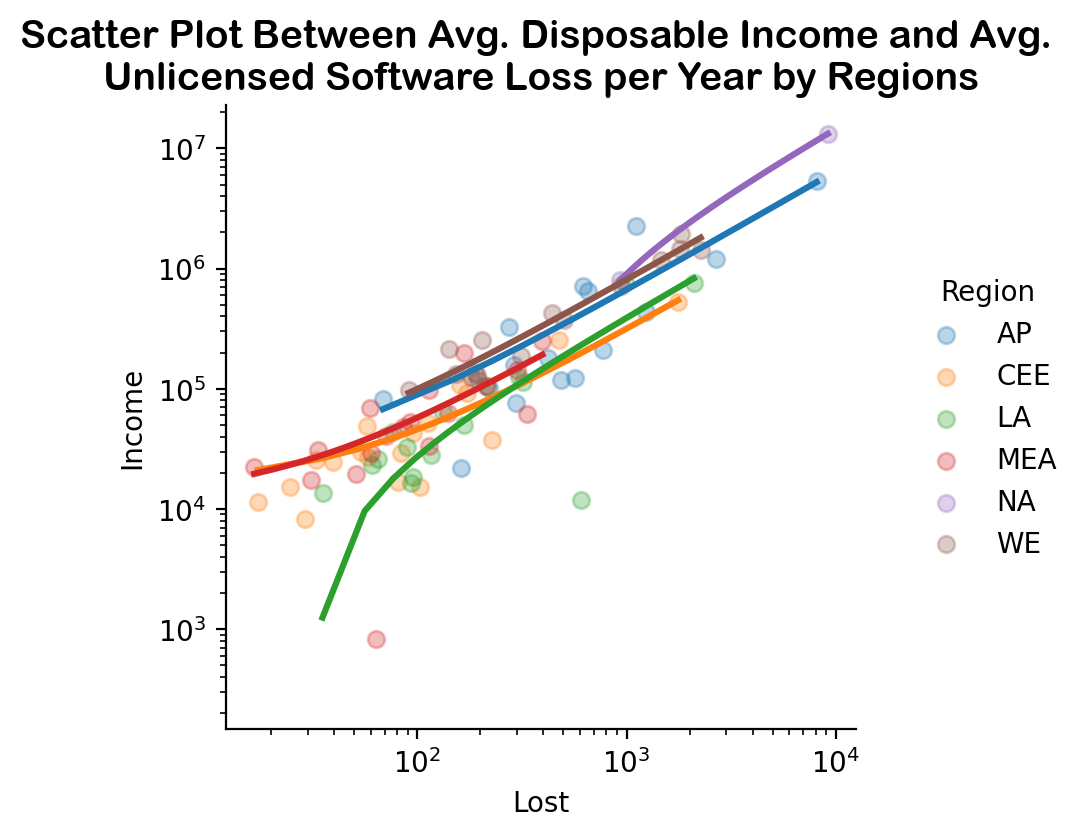

In [11]:
# Scatter Plot show correlation
grid = sns.lmplot(x="Lost", y="Income", data=m_df, hue="Region", height=4, aspect=1,
           scatter_kws={'alpha':.3}, ci=False)
grid.set(xscale="log", yscale="log")
plt.title("Scatter Plot Between Avg. Disposable Income and Avg. \nUnlicensed Software Loss per Year by Regions",
          fontsize=14, fontname='Arial Rounded MT Bold');

In [13]:
# Exclude NA and China
df3 = m_df[m_df["Region"] != "NA"][m_df["Country"] != "China"]
df3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_24580\461500541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = m_df[m_df["Region"] != "NA"][m_df["Country"] != "China"]


,Country,Region,Lost,Income
0,Australia,AP,620.67,715473.34
1,Bangladesh,AP,219.67,101162.66
3,India,AP,2689.67,1209014.89
4,Indonesia,AP,1234.33,436347.99
5,Japan,AP,1108.33,2246537.51


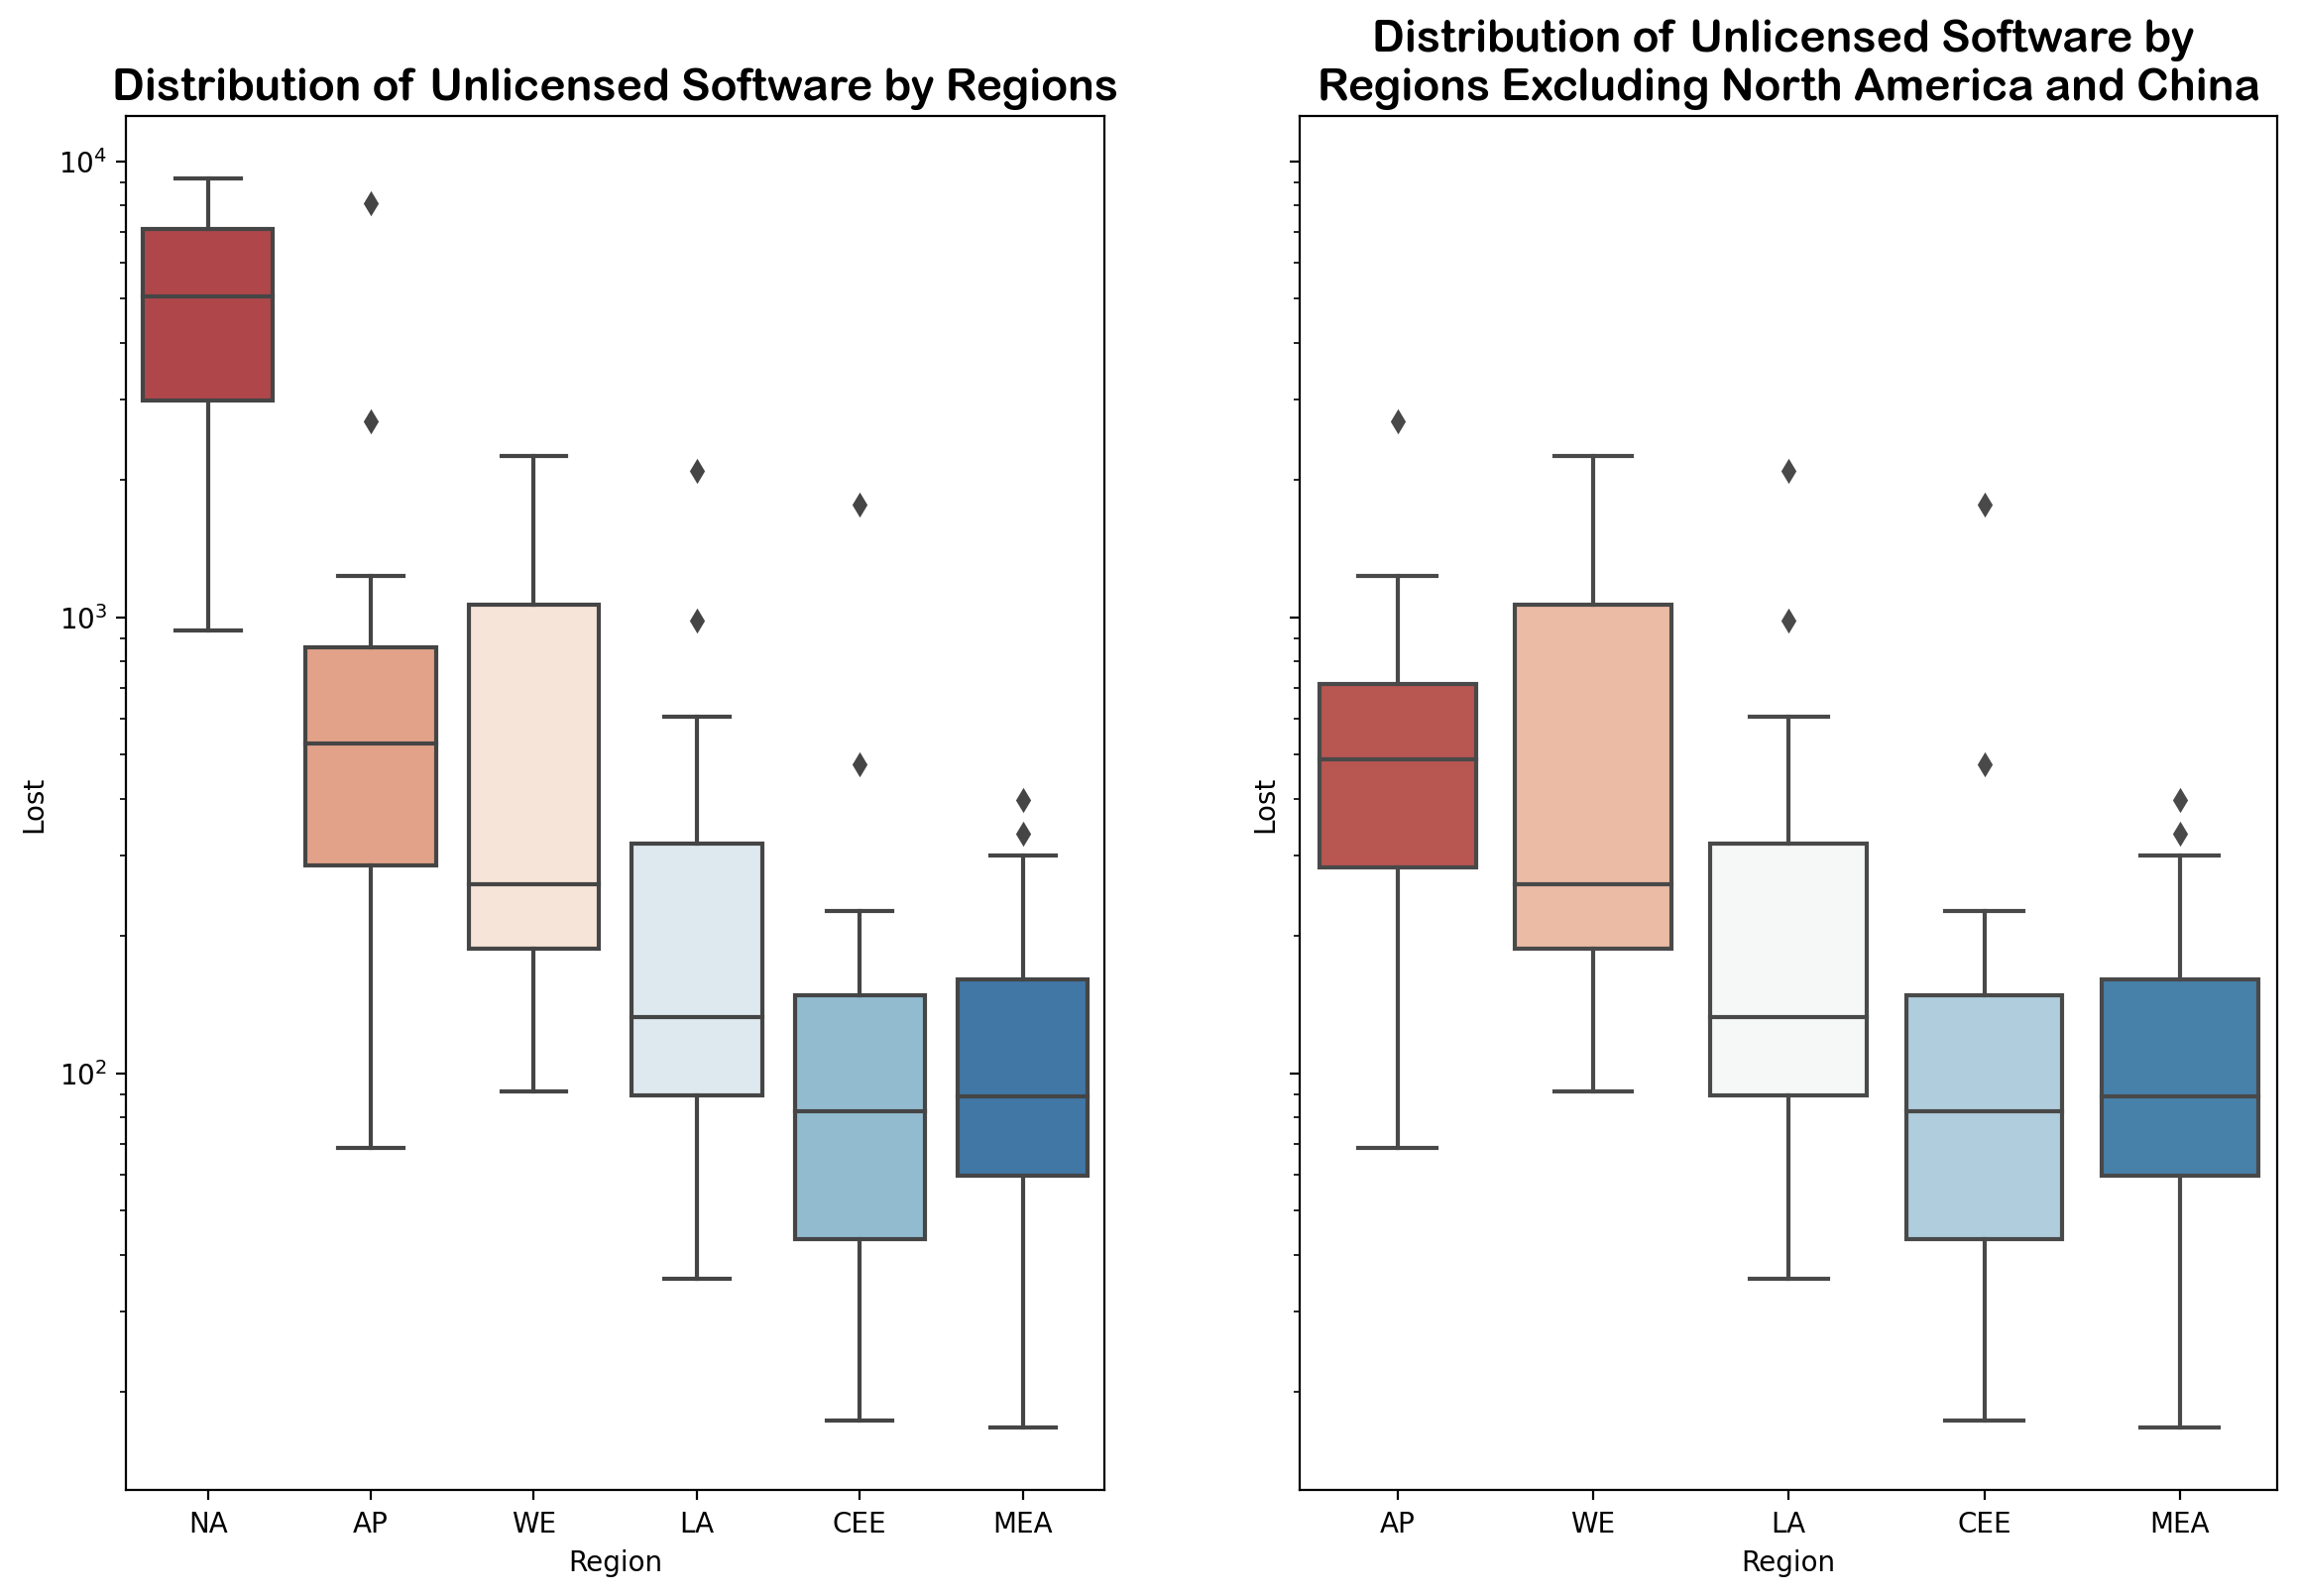

In [16]:
# Box plot show outliner
fig, ax = plt.subplots(1, 2, figsize=(14,9), sharey=True)
x_axis, y_axis = "Region", "Lost"

grid2 = sns.boxplot(x=x_axis, y=y_axis, data=m_df.sort_values(["Lost"], ascending=False), ax=ax[0], palette="RdBu")
grid2.set(yscale="log")
ax[0].set_title("Distribution of Unlicensed Software by Regions", 
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.boxplot(x=x_axis, y=y_axis, data=df3.sort_values(["Lost"], ascending=False), ax=ax[1], palette="RdBu")
ax[1].set_title("Distribution of Unlicensed Software by \nRegions Excluding North America and China", 
                fontsize=16, fontname='Arial Rounded MT Bold');

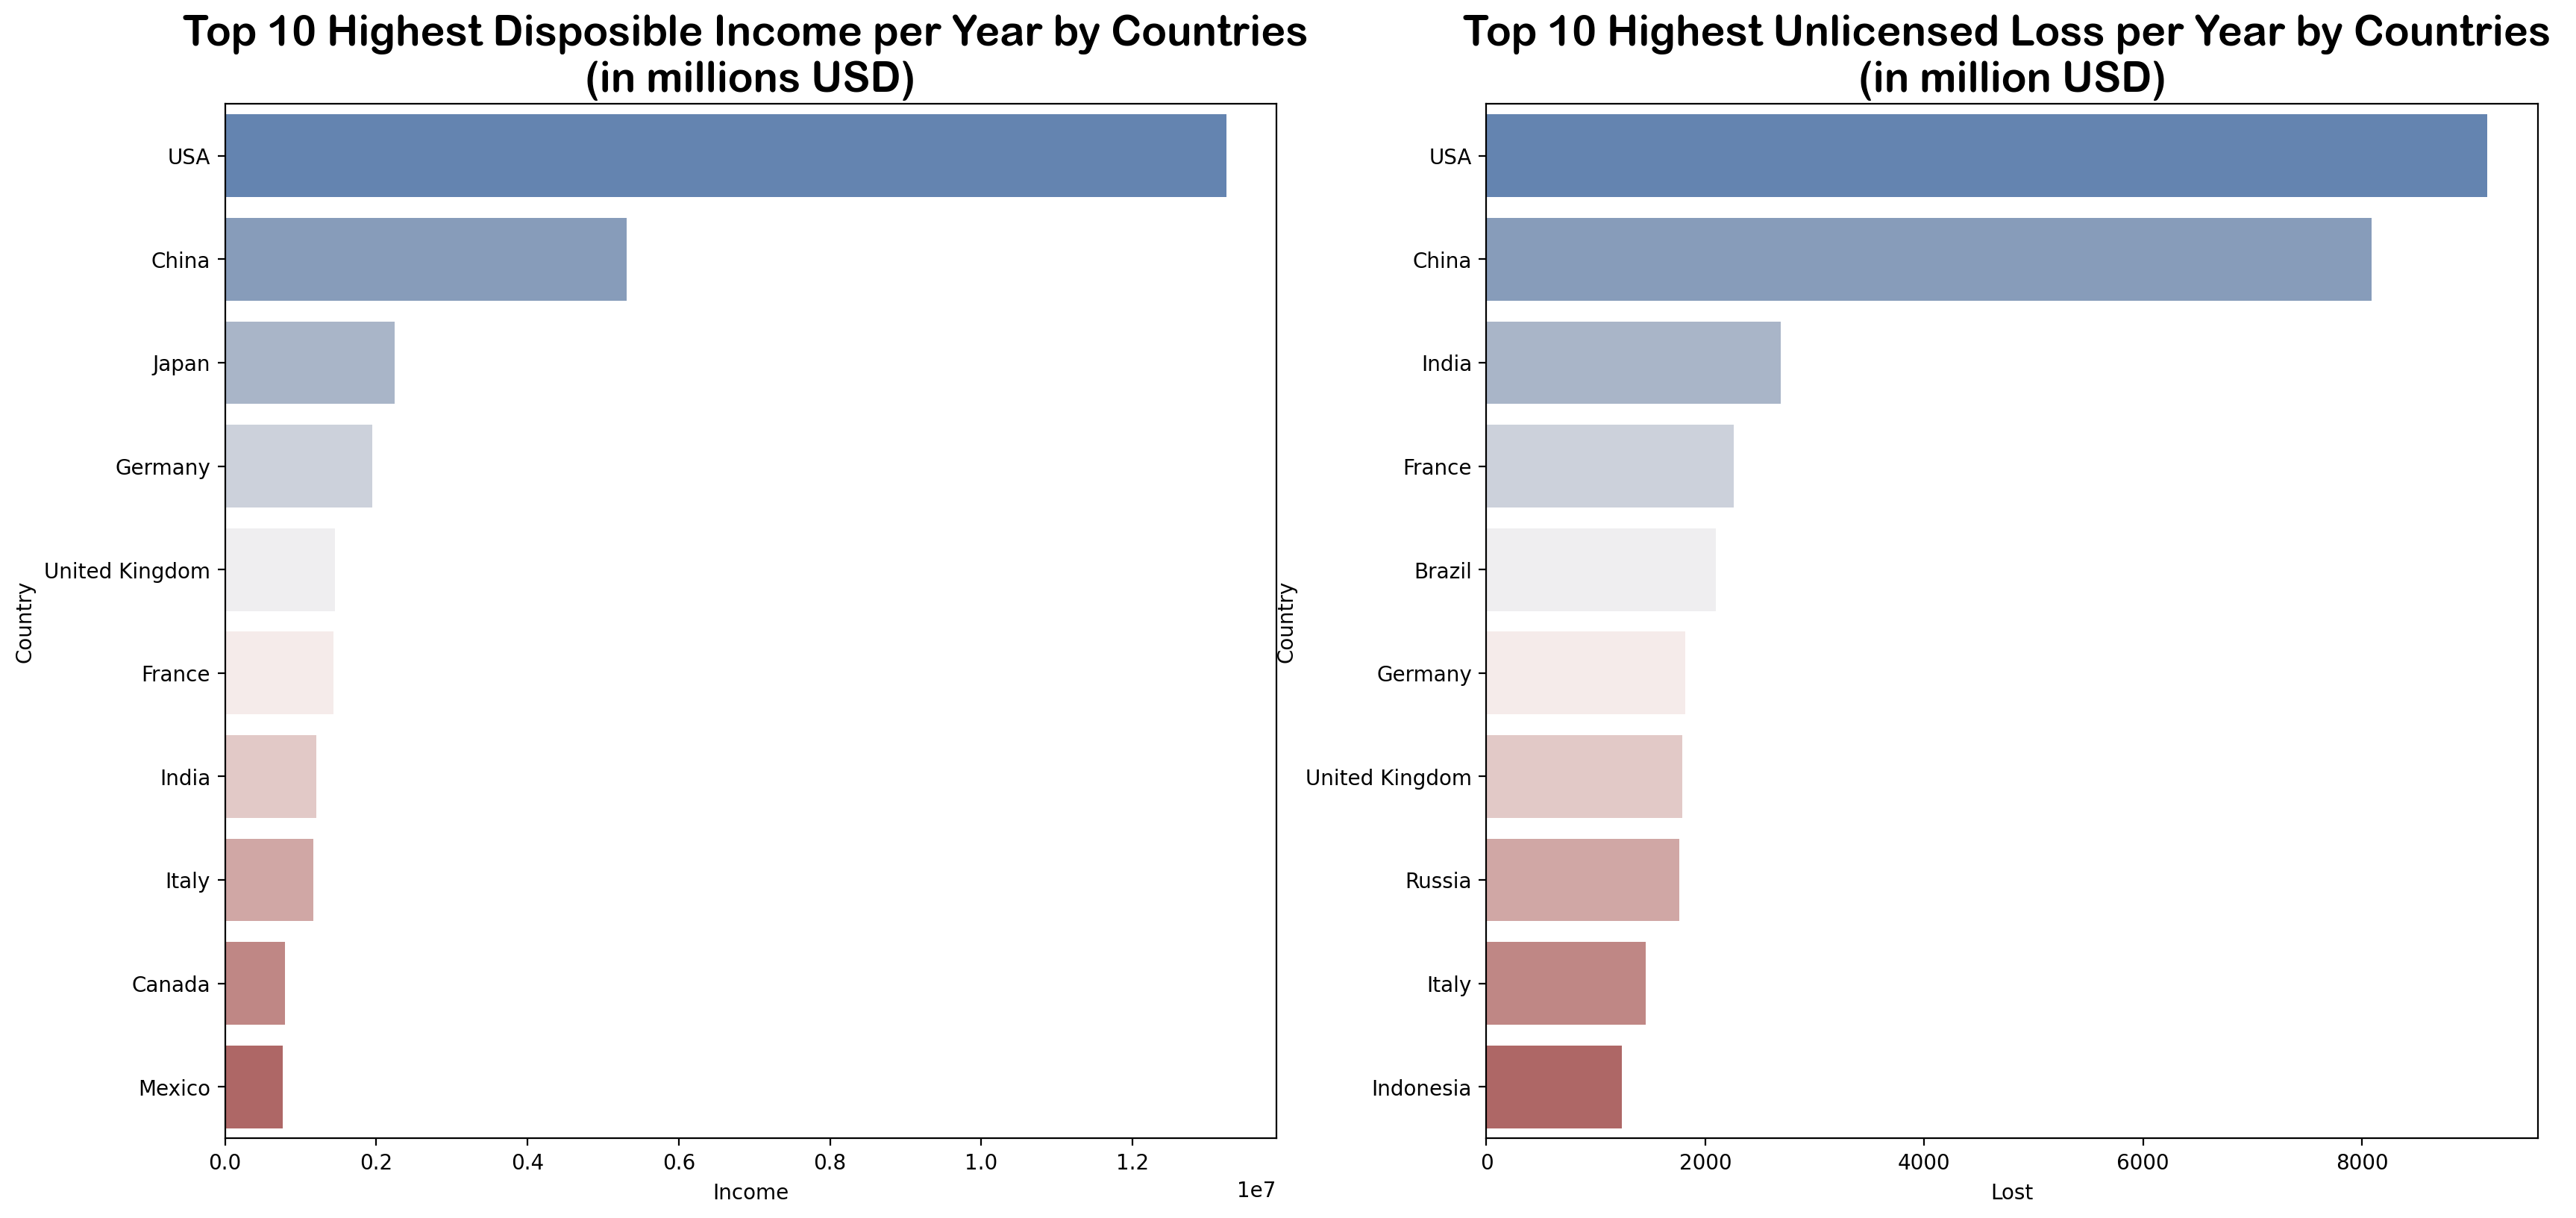

In [17]:
# Highest income & Lost by country
fig, ax = plt.subplots(1, 2, figsize=(20,9))
y_axis = "Country"

grid2 = sns.barplot(x="Income", y=y_axis, data=m_df.sort_values("Income", ascending=False).head(10), ax=ax[0], palette="vlag")
ax[0].set_title("Top 10 Highest Disposible Income per Year by Countries \n(in millions USD)",
                fontsize=20, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x="Lost", y=y_axis, data=m_df.sort_values("Lost", ascending=False).head(10), ax=ax[1], palette="vlag")
ax[1].set_title("Top 10 Highest Unlicensed Loss per Year by Countries \n(in million USD)",
                fontsize=20, fontname='Arial Rounded MT Bold');

C:\Users\User\AppData\Local\Temp\ipykernel_24580\3409412701.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid2 = sns.barplot(x=x_axis, y="Income", data=m_df.sort_values("Income",
C:\Users\User\AppData\Local\Temp\ipykernel_24580\3409412701.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  grid3 = sns.barplot(x=x_axis, y="Lost", data=m_df.sort_values("Income",


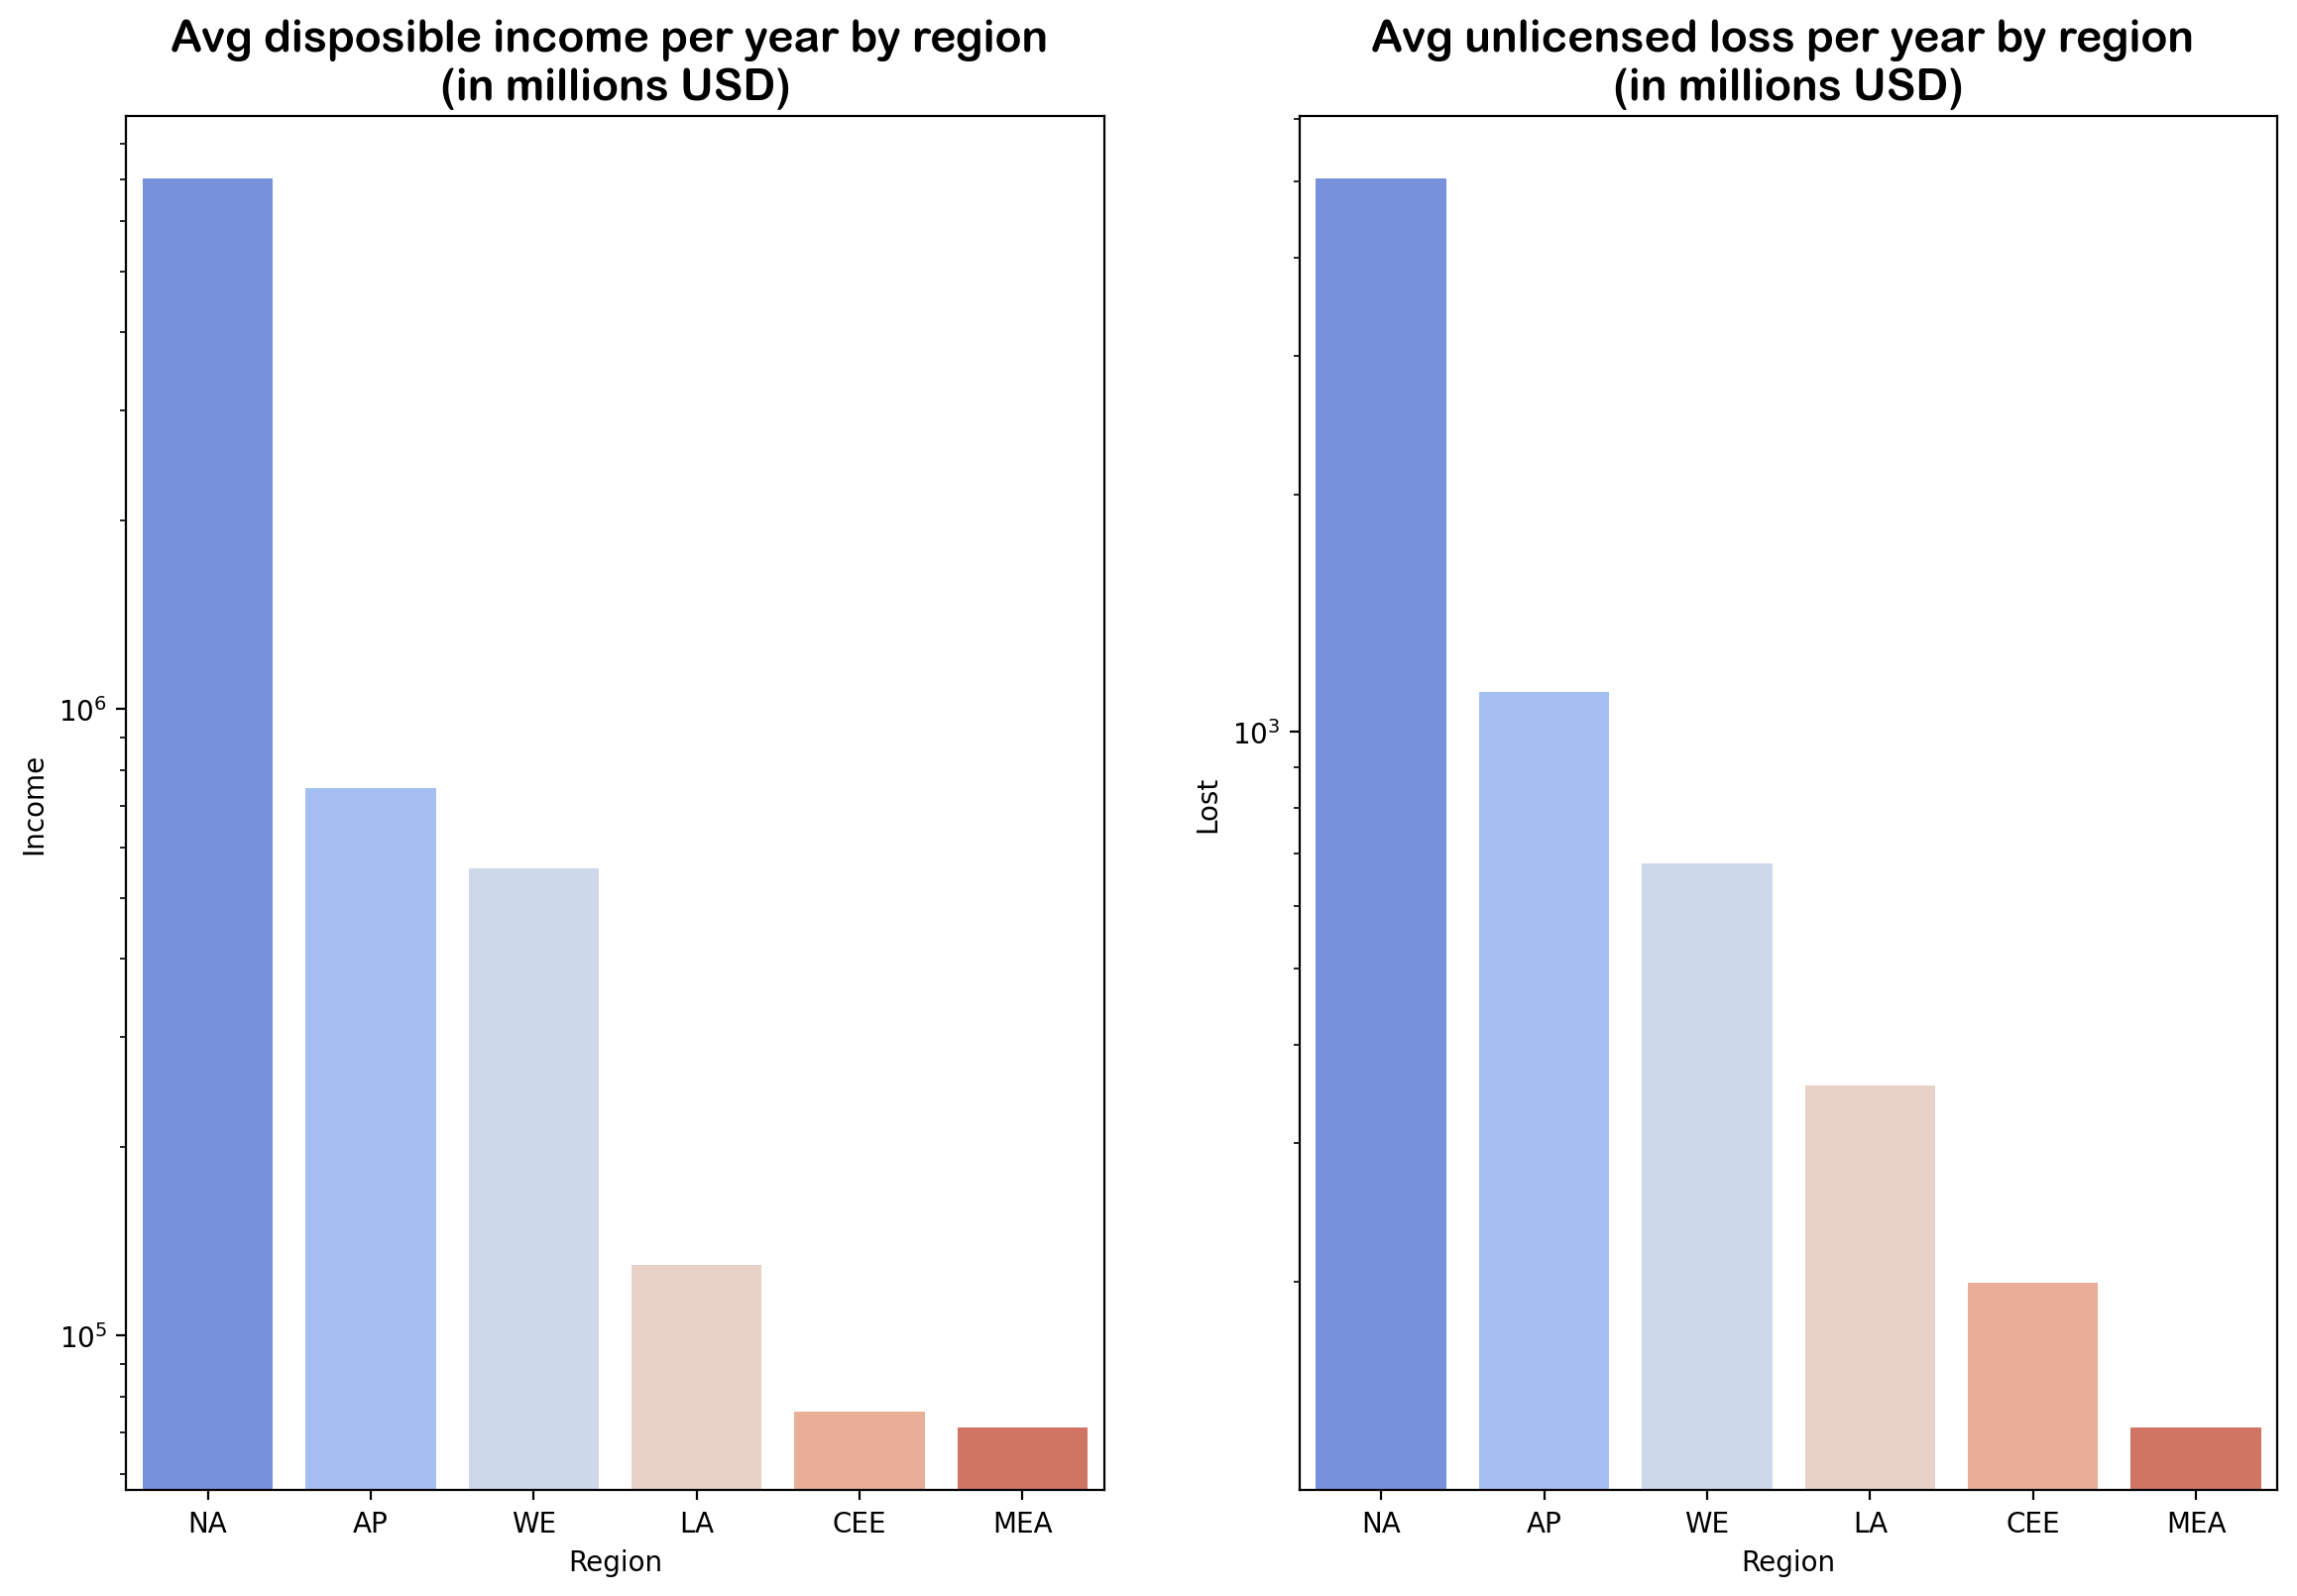

In [18]:
# Highest income & Lost by region
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid2 = sns.barplot(x=x_axis, y="Income", data=m_df.sort_values("Income", 
        ascending=False), ax=ax[0], ci=None, palette="coolwarm")
ax[0].set_title("Avg disposible income per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')

grid3 = sns.barplot(x=x_axis, y="Lost", data=m_df.sort_values("Income",
        ascending=False), ax=ax[1], ci=None, palette="coolwarm")
ax[1].set_title("Avg unlicensed loss per year by region \n(in millions USD)",
                fontsize=16, fontname='Arial Rounded MT Bold')
grid2.set(yscale="log")
grid3.set(yscale="log");

In [ ]:
# Scatter 2 years compared
fig, ax = plt.subplots(1, 2, figsize=(14,9))
x_axis = "Region"

grid2 = sns.lmplot(x="Lost", y="Income", data=df2, hue="Region", height=4, aspect=1,
        scatter_kws={'alpha':.3}, ci=False)
ax[0].set_title("Avg disposible income per year by region (in millions USD)")

grid3 = sns.barplot(x=x_axis, y="Lost", data=df2.sort_values("Income", ascending=False), ax=ax[1])
ax[1].set_title("Avg unlicensed loss per year by region (in millions USD)")
grid2.set(yscale="log")
grid3.set(yscale="log");